# Proportion of seats held by women in national parliaments(%)

In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go

In [8]:
data = pd.read_excel('API_SG.GEN.PARL.ZS_DS2_en_excel_v2_1217846.xlsx', sheet_name='Data')
meta_countries = pd.read_excel('API_SG.GEN.PARL.ZS_DS2_en_excel_v2_1217846.xlsx', sheet_name='Metadata_Countries')

## Data Munging

In [9]:
# Melt huge list of column values to independent rows
cols = list(data.columns)
data = pd.melt(data, 
               id_vars=cols[:4], 
               value_vars=cols[5:])

# Drop unnecessary columns
data = data.drop(['Indicator Name','Indicator Code'], axis=1)

# Column rename
data.columns = ['Country Name','Country Code','Year', 'Seats Held in National Parliment']

## HYPOTHESIS

**Graph**
<ul>
    <li> World level trend of seats Held in National Parliment by women </li>
    <li> Chlorepeth map country level trend of seats Held in National Parliment by women </li>
    <li> Country level trend </li>
    <li> Comparision with IncomeGroup group </li>
    <li> Region wise comparision  </li>
    <li> Forecast </li>
</ul>

**Interaction**
<ul>
    <li>Aggregate by min, max and median </li>
</ul>

## EDA

### World level trend of seats Held in National Parliment by women

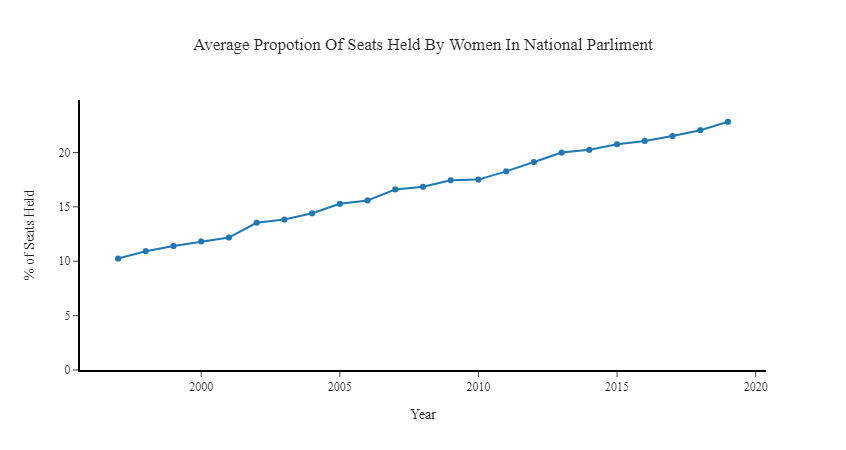

In [36]:
world_level = data.groupby(['Year'], as_index=False).agg({'Seats Held in National Parliment': 'mean'})  # Year aggregation
world_level = world_level[~world_level['Seats Held in National Parliment'].isnull()]  # Use only available values of proportion

# Annotation
x_annot, y_annot = world_level[world_level['Year'] == world_level['Year'].min()][['Year', 'Seats Held in National Parliment']].values.tolist()[0]

# Draw figure
fig = px.line(world_level,
              x='Year',
              y='Seats Held in National Parliment',
              template='simple_white',
              hover_name='Year',
              title='Average Propotion Of Seats Held By Women In National Parliment')

# Set custom hover message
fig.update_traces(mode="markers+lines",
                  hovertemplate="%{y:.2f} % of seats were held in %{x}")

fig.update_layout(xaxis=dict(title='Year',
                             linewidth=2,
                             linecolor='black'),
                  yaxis=dict(title='% of Seats Held',
                             range=[0, world_level['Seats Held in National Parliment'].max() + 2],
                             linewidth=2,
                             linecolor='black'),
                  title=dict(x=0.5)
                  )

fig.update_layout(
    font_family="Droid Serif",
    title_font_family="Open Sans",
    legend_title_font_color="green"
)

### Chlorepeth map country level trend of seats Held in National Parliment by women

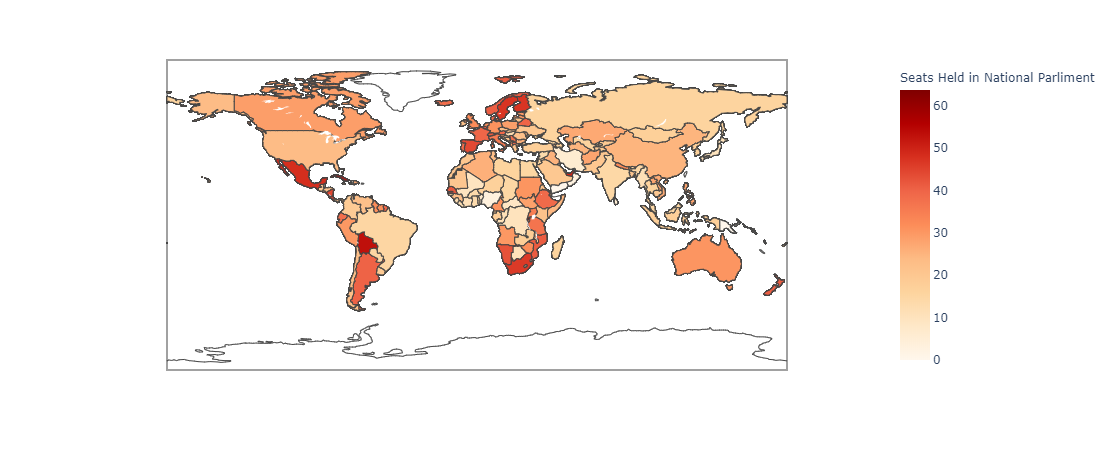

In [35]:
country_level = data.groupby(['Year', 'Country Name', 'Country Code'], as_index=False).agg({'Seats Held in National Parliment': 'mean'})
country_level = country_level[~country_level['Seats Held in National Parliment'].isnull()]  # Use only available values of proportion

fig = px.choropleth(country_level, 
                    locations="Country Code",
                    color="Seats Held in National Parliment", # lifeExp is a column of gapminder
                    hover_name="Country Name", # column to add to hover information
                    color_continuous_scale='OrRd',
                    template='plotly_white')
fig.show()

### Comparision with IncomeGroup group 